## Importar librerias

In [41]:
import librosa
import numpy as np
import sounddevice as sd
import wave
from frontend import vectorizer
import matplotlib.pyplot as plt

## Grabar audio

In [24]:
# Dispositivos disponibles
dispositivos_disponibles = sd.query_devices()
print("Dispositivos disponibles:")
for i, dispositivo in enumerate(dispositivos_disponibles):
    print(f"{i + 1}. {dispositivo['name']}")

Dispositivos disponibles:
1. Asignador de sonido Microsoft - Input
2. Micrófono (Realtek(R) Audio)
3. Asignador de sonido Microsoft - Output
4. Realtek HD Audio 2nd output (Re
5. BenQ GW2283 (NVIDIA High Defini
6. Altavoces (7.1 Surround Sound)
7. Controlador primario de captura de sonido
8. Micrófono (Realtek(R) Audio)
9. Controlador primario de sonido
10. Realtek HD Audio 2nd output (Realtek(R) Audio)
11. BenQ GW2283 (NVIDIA High Definition Audio)
12. Altavoces (7.1 Surround Sound)
13. Realtek ASIO
14. Realtek HD Audio 2nd output (Realtek(R) Audio)
15. BenQ GW2283 (NVIDIA High Definition Audio)
16. Altavoces (7.1 Surround Sound)
17. Micrófono (Realtek(R) Audio)
18. Headphones (Realtek HD Audio 2nd output)
19. Mezcla estéreo (Realtek HD Audio Stereo input)
20. Línea de entrada (Realtek HD Audio Line input)
21. Micrófono (Realtek HD Audio Mic input)
22. Speakers (Realtek HD Audio output)
23. Output (NVIDIA High Definition Audio)
24. Speakers 1 (7.1 Surround Sound Wave Speaker Headphone

In [28]:
dispositivo_seleccionado = int(input("Selecciona el número del dispositivo de entrada: ")) - 1

In [34]:
def grabar_audio(nombre_archivo, duracion_segundos, dispositivo):
    fs = 44100  # Frecuencia de muestreo

    print(f"Grabando {duracion_segundos} segundos de audio desde el dispositivo {dispositivo}...")
    audio = sd.rec(int(fs * duracion_segundos), samplerate=fs, channels=1, device=dispositivo, dtype=np.int16)
    sd.wait()

    # Guarda el audio en un archivo WAV
    with wave.open(nombre_archivo, 'wb') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(fs)
        wf.writeframes(audio.tobytes())

In [36]:
audio = grabar_audio( "audio.wav",3, dispositivo_seleccionado )

Grabando 3 segundos de audio desde el dispositivo 7...


## Cargar el audio en el formato que librosa lo requiere

In [37]:
audio_file = "audio.wav"
y, sr = librosa.load(audio_file)

## Llamar el front-end

In [40]:
feature_vector = vectorizer( audio = y, sample_rate = sr )

## Mostrar el MFCC

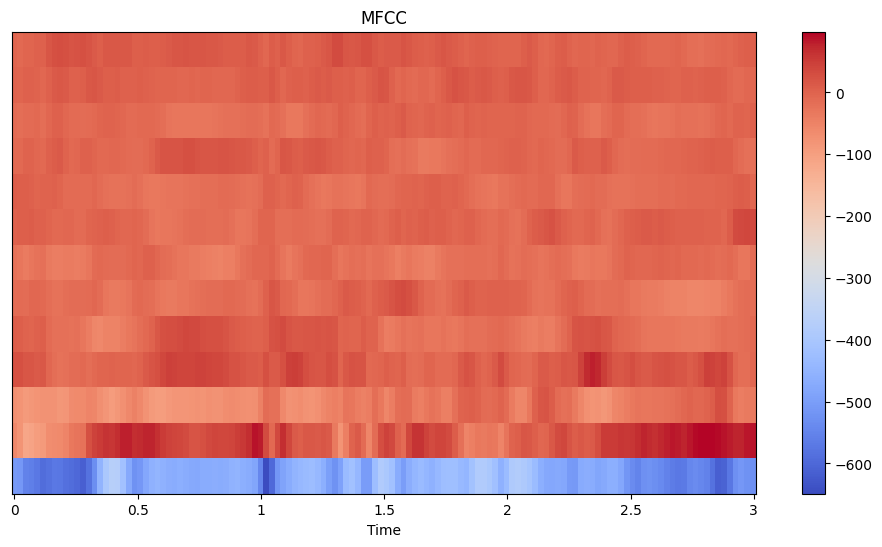

In [43]:
# Graficar los coeficientes MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(feature_vector, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()